<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Steps</h1>

* [Import Libraries](#Import-Libraries)

* [Load Datasets](#Load-Datasets)

* [Data Exploration](#Data-Exploration)

* [Data Cleaning](#Data-Cleaning)

* [Data Analysis and Visualization](#Data-Analysis-and-Visualization)
  
* [Data Transformation](#Data-Transformation)
  
* [Feature Selection](#Feature-Selection)
  
* [Splitting Dataset](#Splitting-Dataset)

* [Data Modelling](#Data-Modelling)


* Ware_house_ID : Unique Warehouse id where product is prepared for dispatch
* WH_Manager_ID : Manager Id present in the warehouse
* zone : Zone of the Warehouse
* WH_regional_zone : Regional Zone of the warehouse
* num_refill_req_l3m :  Refilling request received by the warehouse in the last 3 months
* transport_issue_l1y : No. of transport issued for warehouse in last 1 year
* Competitor_in_mkt : No. of competitors in the market
* retail_shop_num : Number of retail shops who sell noodlesproduced by the warehouse
* wh_owner_type : The warehouse is owned by the company or it is on rent
* distributor_num : No. of distributor who works between warehouse and retail shops
* flood_impacted : Is the warehouse in a flood impacted area or not
* flood_proof : Warehouse is having flood proof indicator
* electric_supply : Does the warehouse have proper electric supply along with some power backup
* dist_from_hub : distance from the warehouse to production hub
* workers_num : no. workers in the warehouse
* wh_est_year : warehouse establishment year
* storage_issue_reported_l3m : storage issues reported by the warehouse in the last 3 months
* govt_check_l3m : Government checking in last 3 months
* temp_reg_mach : warehouse having temperature regulating machine indicator or not
* approved_wh_govt_certificate : Type of approval warehouse having been issued by government
* wh_breakdown_l3m : Number of times the warehouse faces thebreakdown in the last 3 months
* product_wg_ton : Product weight

In [5]:
!pip install pandas
!pip install numpy
!pip install seaborn

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 wi

In [7]:
!pip install matplotlib
!pip install sklearn



DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import warnings
warnings.simplefilter(action='ignore')

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Load Datasets</h1>

In [9]:
# train dataset
df = pd.read_csv("FMCG_data.csv")

# test dataset
df_test = pd.read_csv("FMCG_data.csv")

In [10]:
df

,Date,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton,prediction
0,01-01-2023,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,91,29.0,NaN,13,0.0,A,5.0,15.0,17115.0,NaN
1,01-01-2023,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,210,31.0,NaN,4,0.0,A,3.0,17.0,5074.0,NaN
2,01-01-2023,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,161,37.0,NaN,17,0.0,A,6.0,22.0,23137.0,NaN
3,01-01-2023,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,103,21.0,NaN,17,1.0,A+,3.0,27.0,22115.0,NaN
4,01-01-2023,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,112,25.0,2009.0,18,0.0,C,6.0,24.0,24071.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349996,01-02-2024,WH_124996,EID_74996,Rural,Mid,West,Zone 2,4,7,1,...,130,39.0,2005.0,23,0.0,B,21.0,36.0,37853.0,NaN
349997,01-02-2024,WH_124997,EID_74997,Urban,Large,South,Zone 5,12,4,0,...,147,27.0,2012.0,12,1.0,A,30.0,55.0,65888.0,NaN
349998,01-02-2024,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,4,10,...,60,44.0,NaN,24,0.0,B,17.0,38.0,38534.0,NaN
349999,01-02-2024,WH_124999,EID_74999,Rural,Mid,West,Zone 4,3,3,4,...,239,57.0,NaN,22,0.0,B+,16.0,41.0,58351.0,NaN


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Exploration</h1>

In [11]:
# display first 5 rows from train data

df.head().T

,0,1,2,3,4
Date,01-01-2023,01-01-2023,01-01-2023,01-01-2023,01-01-2023
Ware_house_ID,WH_100000,WH_100001,WH_100002,WH_100003,WH_100004
WH_Manager_ID,EID_50000,EID_50001,EID_50002,EID_50003,EID_50004
Location_type,Urban,Rural,Rural,Rural,Rural
WH_capacity_size,Small,Large,Mid,Mid,Large
zone,West,North,South,North,North
WH_regional_zone,Zone 6,Zone 5,Zone 2,Zone 3,Zone 5
Refill_Requests,3,0,1,7,3
transport_issue,1,0,0,4,1
No_of_Competitor,2,4,4,2,2


In [12]:
# shape and size of train data

print("Shape : ", df.shape)
print("Size : ", df.size)

Shape :  (350001, 26)
Size :  9100026


In [13]:
# shape and size of test data

print("Shape : ", df_test.shape)
print("Size : ", df_test.size)

Shape :  (350001, 26)
Size :  9100026


In [14]:
#display all columns

print(df.columns)
print(' ')
print("Total columns in train dataset = ", len(df.columns))
print("Total columns in test dataset = ", len(df_test.columns))

Index(['Date', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'Refill_Requests',
       'transport_issue', 'No_of_Competitor', 'No_of_retailers',
       'Warehouse_Ownership', 'Number_of_distributors', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown', 'govt_check',
       'product_wg_ton', 'prediction '],
      dtype='object')
 
Total columns in train dataset =  26
Total columns in test dataset =  26


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350001 entries, 0 to 350000
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          350001 non-null  object 
 1   Ware_house_ID                 350001 non-null  object 
 2   WH_Manager_ID                 350001 non-null  object 
 3   Location_type                 350001 non-null  object 
 4   WH_capacity_size              350001 non-null  object 
 5   zone                          350001 non-null  object 
 6   WH_regional_zone              350001 non-null  object 
 7   Refill_Requests               350001 non-null  int64  
 8   transport_issue               350001 non-null  int64  
 9   No_of_Competitor              350001 non-null  int64  
 10  No_of_retailers               350001 non-null  int64  
 11  Warehouse_Ownership           350001 non-null  object 
 12  Number_of_distributors        350001 non-nul

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350001 entries, 0 to 350000
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          350001 non-null  object 
 1   Ware_house_ID                 350001 non-null  object 
 2   WH_Manager_ID                 350001 non-null  object 
 3   Location_type                 350001 non-null  object 
 4   WH_capacity_size              350001 non-null  object 
 5   zone                          350001 non-null  object 
 6   WH_regional_zone              350001 non-null  object 
 7   Refill_Requests               350001 non-null  int64  
 8   transport_issue               350001 non-null  int64  
 9   No_of_Competitor              350001 non-null  int64  
 10  No_of_retailers               350001 non-null  int64  
 11  Warehouse_Ownership           350001 non-null  object 
 12  Number_of_distributors        350001 non-nul

In [17]:
df.dtypes.value_counts()

int64      10
object      9
float64     7
Name: count, dtype: int64

In [18]:
# display two sample rows of columns with int dtype

df.select_dtypes(include='int64').sample(2).T

,7900,176099
Refill_Requests,4,3
transport_issue,1,1
No_of_Competitor,4,6
No_of_retailers,7514,4657
Number_of_distributors,44,61
flood_impacted,0,0
flood_proof,0,0
electric_supply,1,1
dist_from_hub,180,216
storage_issue_reported,19,38


In [19]:
# display two sample rows of columns with object dtype

df.select_dtypes(include='object').sample(2).T

,220132,342239
Date,01-09-2023,01-02-2024
Ware_house_ID,WH_120132,WH_117239
WH_Manager_ID,EID_70132,EID_67239
Location_type,Rural,Rural
WH_capacity_size,Large,Large
zone,South,North
WH_regional_zone,Zone 5,Zone 6
Warehouse_Ownership,Company Owned,Company Owned
approved_wh_govt_certificate,C,B


In [20]:
# display two sample rows of columns with float dtype

df.select_dtypes(include='float64').sample(2).T

,159342,43866
workers_num,49.0,22.0
wh_est_year,2020.0,NaN
temp_reg_mach,0.0,0.0
wh_breakdown,10.0,3.0
govt_check,26.0,12.0
product_wg_ton,27212.0,7134.0
prediction,NaN,NaN


In [21]:
for i in df:
    print(i)
    print(df[i].unique())
    print("Length of unique values in column ", i, ' :', len(df[i].unique()))
    print(' ')

Date
['01-01-2023' '01-02-2023' '01-03-2023' '01-04-2023' '01-05-2023'
 '01-06-2023' '01-07-2023' '01-08-2023' '01-09-2023' '01-10-2023'
 '01-11-2023' '01-12-2023' '01-01-2024' '01-02-2024']
Length of unique values in column  Date  : 14
 
Ware_house_ID
['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_124997' 'WH_124998'
 'WH_124999']
Length of unique values in column  Ware_house_ID  : 25000
 
WH_Manager_ID
['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_74997' 'EID_74998'
 'EID_74999']
Length of unique values in column  WH_Manager_ID  : 25000
 
Location_type
['Urban' 'Rural']
Length of unique values in column  Location_type  : 2
 
WH_capacity_size
['Small' 'Large' 'Mid']
Length of unique values in column  WH_capacity_size  : 3
 
zone
['West' 'North' 'South' 'East']
Length of unique values in column  zone  : 4
 
WH_regional_zone
['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
Length of unique values in column  WH_regional_zone  : 6
 
Refill_Requests
[ 3  0  1  7  8  4  6  5  2  9 10 1

In [22]:
df.describe().round(2)

,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Number_of_distributors,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,wh_breakdown,govt_check,product_wg_ton,prediction
count,350001.00,350001.00,350001.00,350001.00,350001.00,350001.0,350001.00,350001.00,350001.00,349011.00,183666.00,350001.00,350000.00,350000.00,350000.00,350000.00,0.0
mean,4.72,2.43,3.73,4985.88,61.92,0.1,0.05,0.66,163.54,37.67,2009.38,24.33,0.30,13.27,28.57,35141.77,NaN
std,3.65,2.58,3.00,1285.71,21.65,0.3,0.23,0.47,62.72,11.99,7.53,11.30,0.46,7.64,11.45,14871.88,NaN
min,0.00,0.00,0.00,0.00,8.00,0.0,0.00,0.00,55.00,0.00,1996.00,0.00,0.00,0.00,0.00,0.00,NaN
25%,2.00,0.00,2.00,4141.00,46.00,0.0,0.00,0.00,109.00,30.00,2003.00,16.00,0.00,7.00,20.00,24378.75,NaN
50%,4.00,2.00,3.00,4893.00,62.00,0.0,0.00,1.00,164.00,37.00,2009.00,24.00,0.00,12.00,29.00,34435.00,NaN
75%,7.00,4.00,5.00,5724.00,77.00,0.0,0.00,1.00,218.00,45.00,2016.00,32.00,1.00,19.00,37.00,45229.00,NaN
max,26.00,22.00,22.00,12861.00,146.00,1.0,1.00,1.00,271.00,124.00,2023.00,75.00,1.00,46.00,72.00,93093.00,NaN


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Cleaning</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Train Data</h1>

In [23]:
# display number of unique values in each column

df.nunique().sort_values(ascending=False)

product_wg_ton                  65179
WH_Manager_ID                   25000
Ware_house_ID                   25000
No_of_retailers                  9068
dist_from_hub                     217
Number_of_distributors            138
workers_num                       122
storage_issue_reported             73
govt_check                         70
wh_breakdown                       47
wh_est_year                        28
Refill_Requests                    27
transport_issue                    23
No_of_Competitor                   23
Date                               14
WH_regional_zone                    6
approved_wh_govt_certificate        6
zone                                4
WH_capacity_size                    3
temp_reg_mach                       2
flood_impacted                      2
electric_supply                     2
flood_proof                         2
Warehouse_Ownership                 2
Location_type                       2
prediction                          0
dtype: int64

In [24]:
df.drop(columns=['Ware_house_ID', 'WH_Manager_ID'], inplace = True)

In [25]:
print(len(df[df.duplicated]))

0


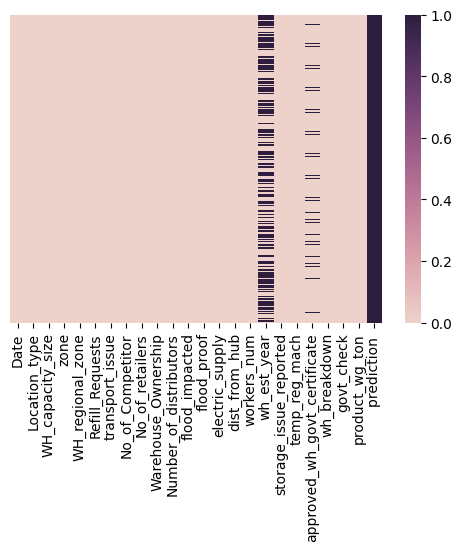

In [26]:
# Missing values
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), yticklabels=False, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [27]:
# print percentage of null values in each column

null_values_features = [i for i in df.columns if df[i].isnull().sum()>1]
for i in null_values_features:
    print(i, np.round(df[i].isnull().mean()*100, 2), "% missing values")

workers_num 0.28 % missing values
wh_est_year 47.52 % missing values
approved_wh_govt_certificate 3.63 % missing values
prediction  100.0 % missing values


In [28]:
# wh_est_year 

df.drop(columns=['wh_est_year'], inplace = True)

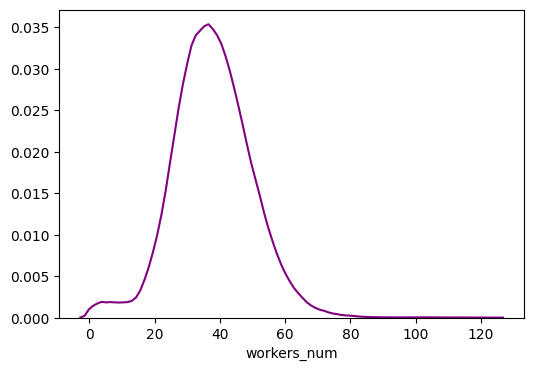

In [29]:
plt.figure(figsize=(6, 4))
sns.distplot(df['workers_num'], hist=False, kde=True, color='purple')
plt.show()

In [30]:
df['workers_num'].median()

37.0

In [31]:
df['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [32]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [33]:
df.isnull().sum()

Date                                 0
Location_type                        0
WH_capacity_size                     0
zone                                 0
WH_regional_zone                     0
Refill_Requests                      0
transport_issue                      0
No_of_Competitor                     0
No_of_retailers                      0
Warehouse_Ownership                  0
Number_of_distributors               0
flood_impacted                       0
flood_proof                          0
electric_supply                      0
dist_from_hub                        0
workers_num                        990
storage_issue_reported               0
temp_reg_mach                        1
approved_wh_govt_certificate         0
wh_breakdown                         1
govt_check                           1
product_wg_ton                       1
prediction                      350001
dtype: int64

In [34]:
# outliers

In [35]:
df.nunique().sort_values(ascending= True)

prediction                          0
temp_reg_mach                       2
electric_supply                     2
flood_proof                         2
Warehouse_Ownership                 2
flood_impacted                      2
Location_type                       2
WH_capacity_size                    3
zone                                4
approved_wh_govt_certificate        6
WH_regional_zone                    6
Date                               14
transport_issue                    23
No_of_Competitor                   23
Refill_Requests                    27
wh_breakdown                       47
govt_check                         70
storage_issue_reported             73
workers_num                       122
Number_of_distributors            138
dist_from_hub                     217
No_of_retailers                  9068
product_wg_ton                  65179
dtype: int64

In [36]:
for i in df.columns[df.nunique()<=4]:
    print("Number of unique values in column ", i, ' :', len(df[i].unique()))
    print(df[i].value_counts())
    print(' ')

Number of unique values in column  Location_type  : 2
Location_type
Rural    321398
Urban     28603
Name: count, dtype: int64
 
Number of unique values in column  WH_capacity_size  : 3
WH_capacity_size
Large    142366
Mid      140280
Small     67355
Name: count, dtype: int64
 
Number of unique values in column  zone  : 4
zone
North    143892
West     111035
South     89068
East       6006
Name: count, dtype: int64
 
Number of unique values in column  Warehouse_Ownership  : 2
Warehouse_Ownership
Company Owned    190092
Rented           159909
Name: count, dtype: int64
 
Number of unique values in column  flood_impacted  : 2
flood_impacted
0    315645
1     34356
Name: count, dtype: int64
 
Number of unique values in column  flood_proof  : 2
flood_proof
0    330876
1     19125
Name: count, dtype: int64
 
Number of unique values in column  electric_supply  : 2
electric_supply
1    229909
0    120092
Name: count, dtype: int64
 
Number of unique values in column  temp_reg_mach  : 3
temp_reg

In [37]:
num_columns = df.select_dtypes(include=['int', 'float'])
num_columns.drop(columns=['product_wg_ton', 'retail_shop_num'], inplace=True)
num_columns.drop(columns=num_columns.columns[num_columns.nunique()<=4], inplace=True)
plt.figure(figsize=(12, 12))
num_columns.boxplot()
plt.xticks(rotation=45)
plt.show()

KeyError: "['retail_shop_num'] not found in axis"

In [ ]:
plt.figure(figsize=(6, 4))

ax1 = plt.subplot2grid((1, 2), (0, 0))

plt.boxplot(df.product_wg_ton)
plt.title('product_wg_ton')

ax2 = plt.subplot2grid((1, 2), (0, 1))

plt.boxplot(df.retail_shop_num)
plt.title('retail_shop_num')

plt.show()

In [ ]:
def count_outliers(df):
    outliers={}
    for i in df.columns:
        if pd.api.types.is_numeric_dtype(df[i]):
            q1 = df[i].quantile(0.25)
            q3 = df[i].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5*iqr
            upper = q3 + 1.5*iqr
            outliers[i] = df[(df[i] < lower) | (df[i] > upper)].shape[0]
        else:
            pass
    return outliers

In [38]:
outlier_counts = count_outliers(df)
outlier_counts

NameError: name 'count_outliers' is not defined

In [39]:
df['product_wg_ton'].corr(df['flood_proof'])

-0.0013781060322405482

In [40]:
df['product_wg_ton'].corr(df['flood_impacted'])

-0.0022768441325800573

In [41]:
df.drop(columns=['flood_proof', 'flood_impacted'], inplace = True)

In [42]:
def remove_outliers(df):
    num_df = df.select_dtypes(include=['int', 'float'])
    q1 = num_df.quantile(0.25)
    q3 = num_df.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_no_outliers = num_df[((num_df >= lower) & (num_df <= upper)).all(axis=1)]
    return df.loc[df_no_outliers.index]

In [43]:
df = remove_outliers(df)
df.shape

(0, 21)

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Test Data</h1>

In [44]:
# display number of unique values in each column

df_test.nunique().sort_values(ascending=False)

product_wg_ton                  65179
WH_Manager_ID                   25000
Ware_house_ID                   25000
No_of_retailers                  9068
dist_from_hub                     217
Number_of_distributors            138
workers_num                       122
storage_issue_reported             73
govt_check                         70
wh_breakdown                       47
wh_est_year                        28
Refill_Requests                    27
transport_issue                    23
No_of_Competitor                   23
Date                               14
WH_regional_zone                    6
approved_wh_govt_certificate        6
zone                                4
WH_capacity_size                    3
temp_reg_mach                       2
flood_impacted                      2
electric_supply                     2
flood_proof                         2
Warehouse_Ownership                 2
Location_type                       2
prediction                          0
dtype: int64

In [45]:
df_test.drop(columns=['Ware_house_ID', 'WH_Manager_ID'], inplace = True)

In [46]:
print(len(df_test[df_test.duplicated]))

0


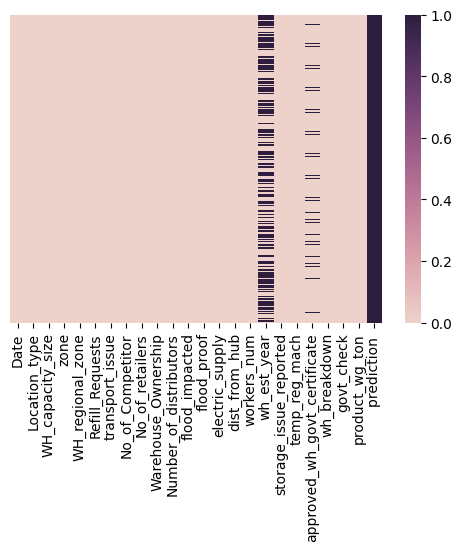

In [47]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_test.isnull(), yticklabels=False, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [48]:
# print percentage of null values in each column

null_values_features = [i for i in df_test.columns if df_test[i].isnull().sum()>1]
for i in null_values_features:
    print(i, np.round(df_test[i].isnull().mean()*100, 2), "% missing values")

workers_num 0.28 % missing values
wh_est_year 47.52 % missing values
approved_wh_govt_certificate 3.63 % missing values
prediction  100.0 % missing values


In [49]:
# wh_est_year 

df_test.drop(columns=['wh_est_year'], inplace = True)

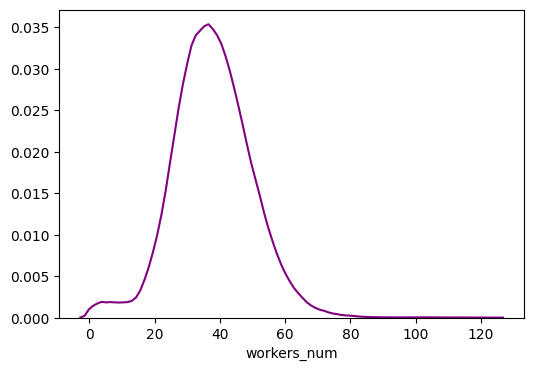

In [50]:
plt.figure(figsize=(6, 4))
sns.distplot(df_test['workers_num'], hist=False, kde=True, color='purple')
plt.show()

In [51]:
df_test['workers_num'].median()

37.0

In [52]:
df_test['workers_num'].fillna(df_test['workers_num'].median(), inplace=True)

In [53]:
df_test['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [54]:
df_test['approved_wh_govt_certificate'].fillna(df_test['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [55]:
df_test.isnull().sum()

Date                                 0
Location_type                        0
WH_capacity_size                     0
zone                                 0
WH_regional_zone                     0
Refill_Requests                      0
transport_issue                      0
No_of_Competitor                     0
No_of_retailers                      0
Warehouse_Ownership                  0
Number_of_distributors               0
flood_impacted                       0
flood_proof                          0
electric_supply                      0
dist_from_hub                        0
workers_num                          0
storage_issue_reported               0
temp_reg_mach                        1
approved_wh_govt_certificate         0
wh_breakdown                         1
govt_check                           1
product_wg_ton                       1
prediction                      350001
dtype: int64

In [56]:
# Outliers

In [57]:
df_test.nunique().sort_values(ascending= True)

prediction                          0
temp_reg_mach                       2
electric_supply                     2
flood_proof                         2
Warehouse_Ownership                 2
flood_impacted                      2
Location_type                       2
WH_capacity_size                    3
zone                                4
approved_wh_govt_certificate        6
WH_regional_zone                    6
Date                               14
transport_issue                    23
No_of_Competitor                   23
Refill_Requests                    27
wh_breakdown                       47
govt_check                         70
storage_issue_reported             73
workers_num                       122
Number_of_distributors            138
dist_from_hub                     217
No_of_retailers                  9068
product_wg_ton                  65179
dtype: int64

In [58]:
for i in df_test.columns[df_test.nunique()<=4]:
    print("Number of unique values in column ", i, ' :', len(df_test[i].unique()))
    print(df_test[i].value_counts())
    print(' ')

Number of unique values in column  Location_type  : 2
Location_type
Rural    321398
Urban     28603
Name: count, dtype: int64
 
Number of unique values in column  WH_capacity_size  : 3
WH_capacity_size
Large    142366
Mid      140280
Small     67355
Name: count, dtype: int64
 
Number of unique values in column  zone  : 4
zone
North    143892
West     111035
South     89068
East       6006
Name: count, dtype: int64
 
Number of unique values in column  Warehouse_Ownership  : 2
Warehouse_Ownership
Company Owned    190092
Rented           159909
Name: count, dtype: int64
 
Number of unique values in column  flood_impacted  : 2
flood_impacted
0    315645
1     34356
Name: count, dtype: int64
 
Number of unique values in column  flood_proof  : 2
flood_proof
0    330876
1     19125
Name: count, dtype: int64
 
Number of unique values in column  electric_supply  : 2
electric_supply
1    229909
0    120092
Name: count, dtype: int64
 
Number of unique values in column  temp_reg_mach  : 3
temp_reg

In [59]:
num_columns = df_test.select_dtypes(include=['int', 'float'])
num_columns.drop(columns=['product_wg_ton', 'retail_shop_num'], inplace=True)
num_columns.drop(columns=num_columns.columns[num_columns.nunique()<=4], inplace=True)
plt.figure(figsize=(12, 12))
num_columns.boxplot()
plt.xticks(rotation=45)
plt.show()

KeyError: "['retail_shop_num'] not found in axis"

AttributeError: 'DataFrame' object has no attribute 'retail_shop_num'

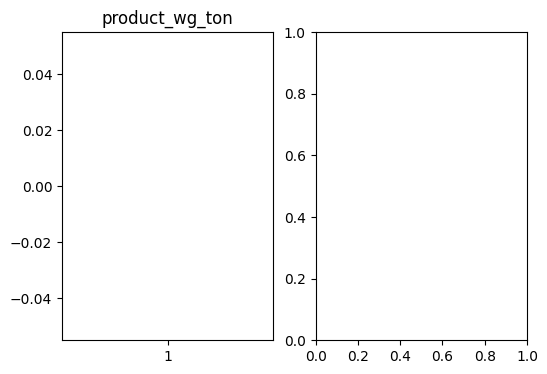

In [60]:
plt.figure(figsize=(6, 4))

ax1 = plt.subplot2grid((1, 2), (0, 0))

plt.boxplot(df_test.product_wg_ton)
plt.title('product_wg_ton')

ax2 = plt.subplot2grid((1, 2), (0, 1))

plt.boxplot(df_test.retail_shop_num)
plt.title('retail_shop_num')

plt.show()

In [61]:
def count_outliers(df_test):
    outliers={}
    for i in df_test.columns:
        if pd.api.types.is_numeric_dtype(df_test[i]):
            q1 = df_test[i].quantile(0.25)
            q3 = df_test[i].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5*iqr
            upper = q3 + 1.5*iqr
            outliers[i] = df_test[(df_test[i] < lower) | (df_test[i] > upper)].shape[0]
        else:
            pass
    return outliers

In [62]:
outlier_counts = count_outliers(df_test)
outlier_counts

{'Refill_Requests': 4159,
 'transport_issue': 3852,
 'No_of_Competitor': 16980,
 'No_of_retailers': 7980,
 'Number_of_distributors': 494,
 'flood_impacted': 34356,
 'flood_proof': 19125,
 'electric_supply': 0,
 'dist_from_hub': 0,
 'workers_num': 8332,
 'storage_issue_reported': 932,
 'temp_reg_mach': 0,
 'wh_breakdown': 436,
 'govt_check': 114,
 'product_wg_ton': 1327,
 'prediction ': 0}

In [63]:
df_test['product_wg_ton'].corr(df_test['flood_proof'])

-0.0013781060322405482

In [64]:
df_test['product_wg_ton'].corr(df_test['flood_impacted'])

-0.0022768441325800573

In [65]:
df_test.drop(columns=['flood_proof', 'flood_impacted'], inplace = True)

In [66]:
def remove_outliers(df_test):
    num_df = df_test.select_dtypes(include=['int', 'float'])
    q1 = num_df.quantile(0.25)
    q3 = num_df.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_no_outliers = num_df[((num_df >= lower) & (num_df <= upper)).all(axis=1)]
    return df_test.loc[df_no_outliers.index]

In [67]:
df_test = remove_outliers(df_test)

In [68]:
df_test.shape

(0, 21)

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Summary</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Analysis and Visualization</h1>

Empty DataFrame
Columns: [Location_type, product_wg_ton]
Index: []
  


ValueError: 'explode' must be of length 'x'

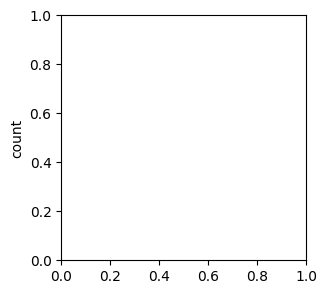

In [69]:
plt.figure(figsize=(12, 7))


# Warehouse location type
# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

print(df.groupby('Location_type')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['Location_type'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.05, 0.05),
                                     startangle=20, ylabel=' ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Warehouse location type', fontsize=10)

#plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))

x = df.groupby('Location_type')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='tan', width=0.2)
plt.title('Average product weight by Warehouse location type', fontsize=10)
plt.ylabel('Avg product weight')

# Warehouse Owner Type

# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))
print(df.groupby('wh_owner_type')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['wh_owner_type'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.05, 0.05),
                                     startangle=180, ylabel=' ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Warehouse owner type', fontsize=10)

# plot 4
ax4 = plt.subplot2grid((2, 2), (1, 1))

x = df.groupby('wh_owner_type')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='lightslategrey', width=0.2)
plt.title('Average product weight by Warehouse owner type', fontsize=10)
plt.ylabel('Avg product weight')

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Warehouse location type & Owner Type</h1>

#### Location type
* Urban areas account for 8 % of the total, while rural areas make up the remaining 92 %.
* The average product weight in rural areas is higher than of urban areas.
* The total product weight in rural areas far exceeds that of urban areas.

#### Owner type
* The first graph illustrates the distribution of warehouse ownership, revealing that 46% of warehouses are rented, while 54% are owned by companies.
* The average product weight in both types of warehouses appears to be nearly identical.
* This data shows a slightly higher total product weight in company-owned warehouses despite their minority in distribution.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Electric_supply & temp_reg_mach availability</h1>

Empty DataFrame
Columns: [temp_reg_mach, product_wg_ton]
Index: []
  


ValueError: 'explode' must be of length 'x'

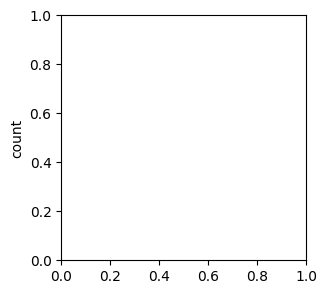

In [70]:
plt.figure(figsize=(12, 7))


# Temperature regulating machine availability
# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

print(df.groupby('temp_reg_mach')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['temp_reg_mach'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'lightblue'], autopct='%1.0f%%', explode=(0.02, 0.05),
                                     startangle=20, ylabel=' ', labels = ['Not Available (0)', 'Available (1)'])

plt.title('Distribution of temp_reg_mach availability', fontsize=10)

#plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))

x = df.groupby('temp_reg_mach')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='lightslategrey', width=0.08)
plt.title('Average product weight by temp_reg_mach availability', fontsize=10)
plt.ylabel('Avg product weight')

# Electric Supply Availability

# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))
print(df.groupby('electric_supply')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['electric_supply'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'lightblue'], autopct='%1.0f%%', explode=(0.02, 0.05),
                                     startangle=180, ylabel=' ', labels = ['Not Available (0)', 'Available (1)'])

plt.title('Distribution of Electric Supply Availability', fontsize=10)

# plot 4
ax4 = plt.subplot2grid((2, 2), (1, 1))

x = df.groupby('electric_supply')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='lightblue', width=0.08)
plt.title('Average product weight by Electric Supply Availability', fontsize=10)
plt.ylabel('Avg product weight')

plt.show()

#### Electric_supply
* 66% of the warehouses surveyed were found to be unavailable, while the remaining 34% were deemed accessible for electric supply.
* The average product weight in the electric supply not available warehouses was lower in comparison to those that were accessible for use.
* Among the available warehouses, total product weight amounted to 203,327,830 units, whereas the not available warehouses collectively held a total   product weight of 106,690,637 units.

#### Temp_reg_mach availability
* The data indicates that the availability of temperature regulating machines in warehouses is limited, with 66% of warehouses reporting unavailability, while only 34% have these machines accessible.
* Despite the lower availability, warehouses with temperature regulating machines available account for a total product weight of 101,599,625 units, compared to 208,418,842 units in warehouses where they are not available.
* The average product weight in warehouses without temperature regulating machines is lower than in those where they are available.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Storage issue reported in the last 3 months</h1>

In [71]:
print("Unique values in Storage issue reported", df['storage_issue_reported_l3m'].unique())
print('  ')
print(df.groupby('storage_issue_reported_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))


# storage issue reported in the last 3 months        
# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['storage_issue_reported_l3m'].value_counts()

plt.stem(x.index, x.values, linefmt='#997688', basefmt='k:', markerfmt='d')
plt.xlabel('No. of storage issue reported')
plt.ylabel('frequency')
plt.title('Frequency of storage issue', fontsize=10)

# plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('storage_issue_reported_l3m')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='tan', width=0.2)
plt.title('Average product weight by storage issue reported', fontsize=10)
plt.xlabel('No. of storage issue reported')
plt.ylabel('Avg product weight')

plt.show()

KeyError: 'storage_issue_reported_l3m'

#### Storage issue reported in the last 3 months
* The variables demonstrate a strong correlation, exhibiting an almost linear relationship.
*  As the product weight rises, storage issues likewise increases.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of warehouse breakdown in the last 3 months</h1>

In [72]:
print("Unique values in no. of warehouse breakdown" , df['wh_breakdown_l3m'].unique())
print('  ')
print(df.groupby('wh_breakdown_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))


# no. of warehouse breakdown in the last 3 months        
# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['wh_breakdown_l3m'].value_counts()

plt.bar(x.index, x.values, color='#769966')
plt.xlabel('No. of warehouse breakdown')
plt.ylabel('Value count')
plt.title('Frequency of warehouse breakdown', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('wh_breakdown_l3m')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='#997688', marker='*')
plt.xlabel('No. of warehouse breakdown')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of warehouse breakdown', fontsize=10)

plt.show()

KeyError: 'wh_breakdown_l3m'

#### No. of warehouse breakdown in the last 3 months
* The variables demonstrate a positive correlation, indicating that as the product weight increases,
  the frequency of warehouse breakdowns also tends to rise.
* The total product weight is higher for values with most value count.

Unique values in zone []
  
Empty DataFrame
Columns: [zone, product_wg_ton]
Index: []
  
Unique values in regional zone []
  
Empty DataFrame
Columns: [WH_regional_zone, product_wg_ton]
Index: []
  


ValueError: 'explode' must be of length 'x'

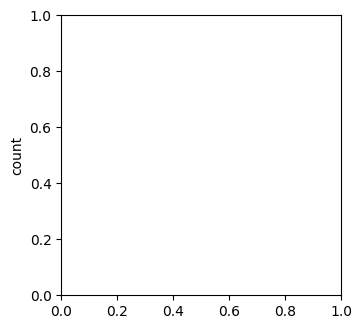

In [73]:
# zone

print("Unique values in zone" , df['zone'].unique())
print('  ')
print(df.groupby('zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

# regional zone

print("Unique values in regional zone" , df['WH_regional_zone'].unique())
print('  ')
print(df.groupby('WH_regional_zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 8))

# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

df['zone'].value_counts().plot(kind = 'pie', colors = ['#997688', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.45),
                                     startangle=50, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Warehouse Zone', fontsize=10)

# plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))


x = df.groupby('zone')['product_wg_ton'].mean()
labels= df['zone'].unique()
plt.pie(x, colors =['#997688', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.25), startangle=5, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse Zone', fontsize=10)

# Regional zone
# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))

df['WH_regional_zone'].value_counts().plot(kind = 'pie', colors = ['lightblue', '#769966'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.45),
                                     startangle=70, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Warehouse Regional Zone', fontsize=10)

# plot 4
ax4 = plt.subplot2grid((2, 2), (1, 1))


x = df.groupby('WH_regional_zone')['product_wg_ton'].mean()
labels= df['WH_regional_zone'].unique()
plt.pie(x, colors =['lightblue', '#769966'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.25), startangle=90, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse Regional Zone', fontsize=10)

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">zone & Regional_zone</h1>

#### zone 
* The North Zone exhibits the highest production levels, whereas the East Zone demonstrates the lowest production levels.
* On the other hand, the subsequent chart illustrates minimal fluctuations in product weight across different zones.
* The total product weight tends to be greater for values that occur most frequently.


#### Regional_zone
* The Regional Zone 6 exhibits a significant number of warehouses.
* Meanwhile, the subsequent chart suggests that there is minimal fluctuation in product weight across different Regional Zone.
* The total product weight tends to be greater for values that occur most frequently.



Unique values in Government certification grades []
  
Empty DataFrame
Columns: [approved_wh_govt_certificate, product_wg_ton]
Index: []
  


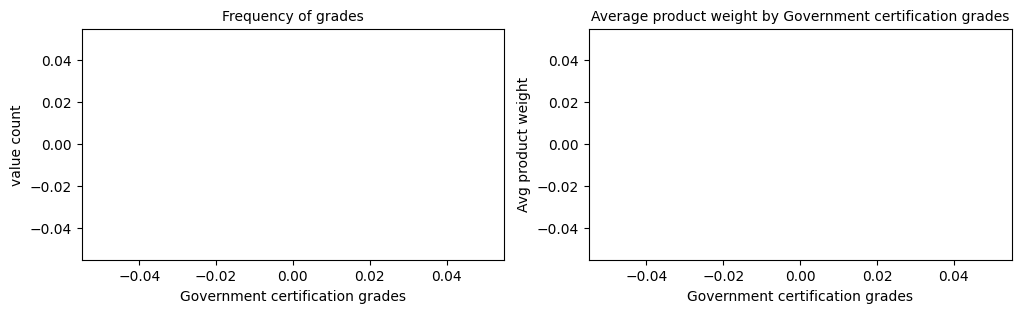

In [74]:
print("Unique values in Government certification grades", df['approved_wh_govt_certificate'].unique())
print('  ')
print(df.groupby('approved_wh_govt_certificate')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 3))

# Government certification
# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['approved_wh_govt_certificate'].value_counts()

plt.scatter(x.index, x.values, color='grey' , marker='o')
plt.xlabel('Government certification grades')
plt.title('Frequency of grades', fontsize=10)
plt.ylabel('value count')

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('approved_wh_govt_certificate')['product_wg_ton'].mean()

plt.scatter(x.index, x.values, color='tan', marker='o')
plt.title('Average product weight by Government certification grades', fontsize=10)
plt.xlabel('Government certification grades')
plt.ylabel('Avg product weight')

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Type of approval by government</h1>

#### Type of approval by government

* The average product weight vs grades demonstrates a correlation between warehouses with the highest government approvals and the highest product weights.
* Although the C grade is the lowest designation, it corresponds to the highest total product weights, primarily because the majority of warehouses are categorized as C grade.




<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">govt checking in last 3 months</h1>

In [75]:
# govt_check_l3m
print("Unique values in govt checking in last 3 months" , df['govt_check_l3m'].unique())
print('  ')
print(df.groupby('govt_check_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['govt_check_l3m'].value_counts()

plt.bar(x.index, x.values, color='#769966')
plt.xlabel('No. of govt checking')
plt.ylabel('Value count')
plt.title('Frequency of govt checking', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('govt_check_l3m')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='tan', marker='*')
plt.xlabel('No. of govt checking')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of govt checking', fontsize=10)

plt.show()

KeyError: 'govt_check_l3m'

In [76]:
# govt_check_l3m
print("Unique values in govt checking in last 3 months" , df['govt_check_l3m'].unique())
print('  ')
print(df.groupby('govt_check_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['govt_check_l3m'].value_counts()

plt.bar(x.index, x.values, color='#769966')
plt.xlabel('No. of govt checking')
plt.ylabel('Value count')
plt.title('Frequency of govt checking', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('govt_check_l3m')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='tan', marker='*')
plt.xlabel('No. of govt checking')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of govt checking', fontsize=10)

plt.show()

KeyError: 'govt_check_l3m'

#### Govt checking in last 3 months
* No. of government checking in last 3 months ranges from 1 to 32 times. The bar graph demonstrates significant fluctuations in value counts.
* As the value count increases, total product weight increases. In case of average product weight, has no notable oscillations.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of workers</h1>

Unique values in No. of workers []
  
Empty DataFrame
Columns: [workers_num, product_wg_ton]
Index: []
  


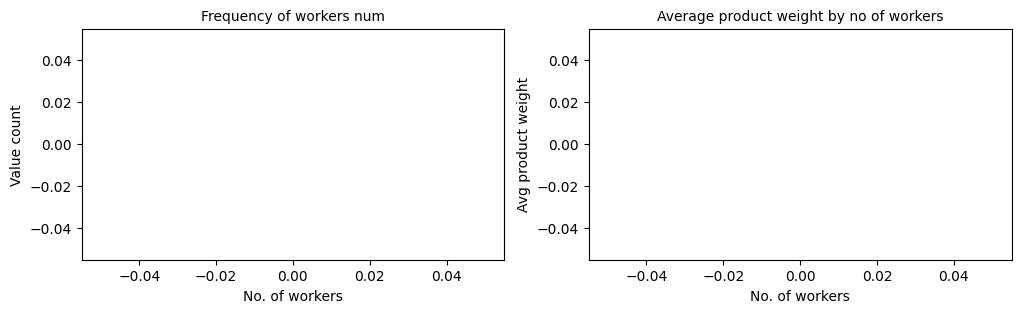

In [77]:
# workers_num
print("Unique values in No. of workers" , df['workers_num'].unique())
print('  ')
print(df.groupby('workers_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['workers_num'].value_counts()

plt.bar(x.index, x.values, color='tan')
plt.xlabel('No. of workers')
plt.ylabel('Value count')
plt.title('Frequency of workers num', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('workers_num')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='#997688', marker='*')
plt.xlabel('No. of workers')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of workers', fontsize=10)

plt.show()

#### No. of workers

*  The value count graph exhibits a distribution resembling a normal curve, with the exception of the central point, which registers higher than all others.
*  There are no significant variations in average product weight in relation to the number of workers. However, when the workforce is at its smallest, the average product weight tends to be lower.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Warehouse capacity size & Transport issue</h1>

In [78]:
# Warehouse capacity size
print("Unique values in Warehouse capacity size", df['WH_capacity_size'].unique())
print('  ')
print(df.groupby('WH_capacity_size')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')
# Transport issue in 1 year
print("Unique values in Transport issue in 1 year", df['transport_issue_l1y'].unique())
print('  ')
print(df.groupby('transport_issue_l1y')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 7))

# Warehouse capacity size
# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

df['WH_capacity_size'].value_counts().plot(kind = 'pie', colors = ['yellow', 'tan', 'lightblue'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.45),
                                     startangle=50, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Warehouse capacity size', fontsize=10)

# plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))


x = df.groupby('WH_capacity_size')['product_wg_ton'].mean()
labels= df['WH_capacity_size'].unique()
plt.pie(x, colors =['yellow', 'tan', 'lightblue'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.25), startangle=5, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse capacity size', fontsize=10)

# transport issue in 1 year
# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))

df['transport_issue_l1y'].value_counts().plot(kind = 'pie', colors = ['lightblue', '#769966', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.45),
                                     startangle=70, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Transport issue', fontsize=10)

# plot 4
ax4 = plt.subplot2grid((2, 2), (1, 1))


x = df.groupby('transport_issue_l1y')['product_wg_ton'].mean()
labels= df['transport_issue_l1y'].unique()
plt.pie(x, colors =['lightblue', '#769966', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.25), startangle=90, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse Transport issue', fontsize=10)

plt.show()

Unique values in Warehouse capacity size []
  
Empty DataFrame
Columns: [WH_capacity_size, product_wg_ton]
Index: []
  


KeyError: 'transport_issue_l1y'

#### Warehouse capacity size

* Different capacity sizes of warehouse are small, mid and large. From the frequency distribution plot, only a lesser number of warehouses are of small
  size. Rest of them are almost equally distributed among mid and large size. It reflects in the total product weight too.
*  No noticable variations can be identify when comparing average product weight of these sizes.

#### Transport issue in last 1 year

* Frequency distribution depicts majority of warehouses didnt face any transport issues in last one year.
* Small percentage of discrepency is seen according to average product weight, but no particular pattern.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Competitor_in_mkt</h1>

Unique values in No. of competitors in the market [2 4 3 5 1 7 6 0]
  
   Competitor_in_mkt  product_wg_ton
2                  2       159407689
3                  3       135219193
4                  4       126812413
5                  5        24092342
6                  6        10558173
1                  1         7995055
7                  7         3437891
0                  0           16056
  


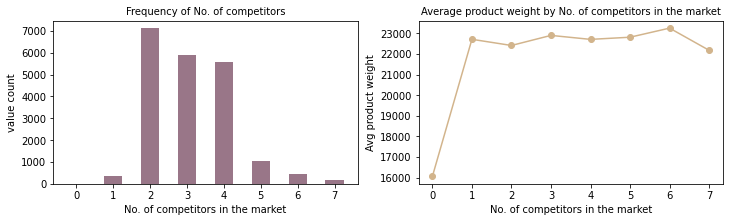

In [75]:
print("Unique values in No. of competitors in the market", df['Competitor_in_mkt'].unique())
print('  ')
print(df.groupby('Competitor_in_mkt')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 3))

# Government certification
# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['Competitor_in_mkt'].value_counts()

plt.bar(x.index, x.values, color='#997688', width=0.5)
plt.xlabel('No. of competitors in the market')
plt.title('Frequency of No. of competitors', fontsize=10)
plt.ylabel('value count')

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('Competitor_in_mkt')['product_wg_ton'].mean()

plt.plot(x.index, x.values, color='tan', marker='o')
plt.title('Average product weight by No. of competitors in the market', fontsize=10)
plt.xlabel('No. of competitors in the market')
plt.ylabel('Avg product weight')

plt.show()

#### No. of competitors in market

* The value count plot shows high variation in distribution.
* Out of the 8 unique values, 3 has most number of values, which means majority of the warehouses have either 2,3, or 4 competitors in market and they makes the highest amount of product in total.
* Comparing Average product weight, warehouses with no competitors has the lowest value and rest of them has no big difference.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of Distributors</h1>

Unique values in No. distributors [24 47 64 42 37 38 45 31 40 48 26 68 50 16 28 58 19 49 69 32 25 46 67 21
 51 57 59 23 17 56 22 63 30 53 66 36 29 44 55 39 54 33 27 18 35 65 34 52
 62 43 70 60 61 41 15 20]
  
    distributor_num  product_wg_ton
16               31         9568020
6                21         9149644
50               65         9080045
26               41         9066857
27               42         8925717
  


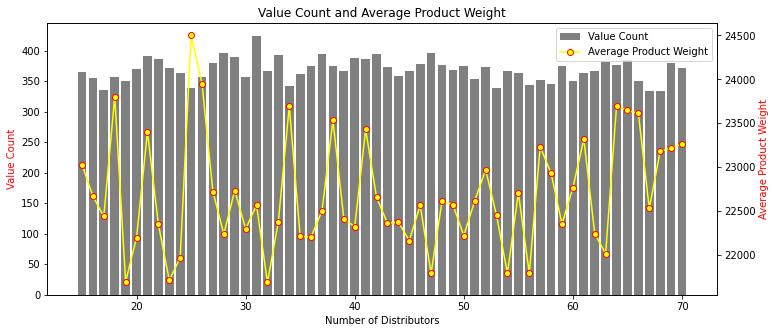

In [76]:
# distributor_num
print("Unique values in No. distributors", df['distributor_num'].unique())
print('  ')
print(df.groupby('distributor_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')


x = df['distributor_num'].value_counts().sort_index()

avg_product_weight = df.groupby('distributor_num')['product_wg_ton'].mean()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plotting the line plot for value count
ax1.bar(x.index, x.values, color='grey',  label='Value Count')
ax1.set_ylabel('Value Count', color='red')

# Creating a secondary y-axis and plotting the bar graph for average product weight
ax2 = ax1.twinx()
ax2.plot(avg_product_weight.index, avg_product_weight.values, color='yellow', marker='o', markeredgecolor = 'red', label='Average Product Weight')
ax2.set_ylabel('Average Product Weight', color='red')

# Adding legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2)

# Setting labels and title
ax1.set_xlabel('Number of Distributors')
plt.title('Value Count and Average Product Weight')


plt.show()

#### No. of Distributors

* The values are distributed almost evenly, as evident from the frequency distribution.
* The line plot illustrates minimal variations in average product weight, ranging from 20,000 to 24,500, without displaying any pattern.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of refill request in last 3 months</h1>

Unique values in No. of refill request in last 3 months [3 0 1 8 7 4 6 5 2]
  
   num_refill_req_l3m  product_wg_ton
3                   3        56473478
0                   0        55613728
5                   5        54937666
1                   1        54500763
8                   8        53986953
7                   7        53399008
4                   4        53097489
6                   6        52297263
2                   2        33232464
  


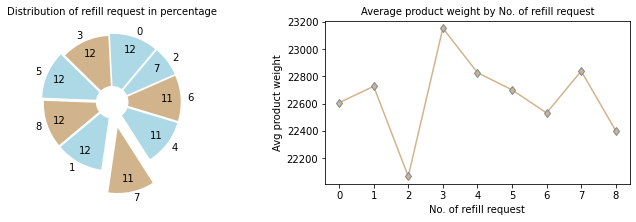

In [79]:
print("Unique values in No. of refill request in last 3 months", df['num_refill_req_l3m'].unique())
print('  ')
print(df.groupby('num_refill_req_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 3))

# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

df['num_refill_req_l3m'].value_counts().plot(kind = 'pie', colors = ['lightblue', 'tan'], autopct='%1.0f', explode=[0.05, 0.02, 0.08, 0.05, 0.05, 0.4, 0.05, 0.05, 0.05],
                                     startangle=50, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.25, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of refill request in percentage', fontsize=10)


# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('num_refill_req_l3m')['product_wg_ton'].mean()

plt.plot(x.index, x.values, color='tan', marker='d', markeredgecolor='lightslategrey')
plt.title('Average product weight by No. of refill request', fontsize=10)
plt.xlabel('No. of refill request')
plt.ylabel('Avg product weight')

plt.show()

#### No. of refill request in last 3 months

* The distribution of no. of refill request in last 3 months is almost uniform with percentage 12 and 11 except for one value, which is 7%.
* Average product weight among them falls within the range of 22,000 to 24,000, indicating minimal variation. Also, total product weight positively correlated with value counts.


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Distance from hub</h1>

In [80]:
df_copy = df.copy()

In [81]:
print("Total no. of unique values in Distance from hub", len(df['dist_from_hub'].unique()))
print('  ')

# define bin edges : 
# Retail shop number : min value = 55, max value = 271

bins =[55, 80, 105, 130, 155, 180, 205, 230, 255]



# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['dist_from_hub'], bins)

bin_counts = df_copy['bins'].value_counts().sort_index()

# Create a DataFrame from bin_counts
table_df = pd.DataFrame({'Bin': bin_counts.index, 'Count': bin_counts.values})

# Display the table
print(table_df)

Total no. of unique values in Distance from hub 217
  
          Bin  Count
0    (55, 80]   2346
1   (80, 105]   2340
2  (105, 130]   2375
3  (130, 155]   2409
4  (155, 180]   2385
5  (180, 205]   2371
6  (205, 230]   2339
7  (230, 255]   2391


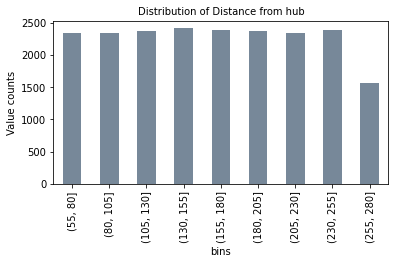

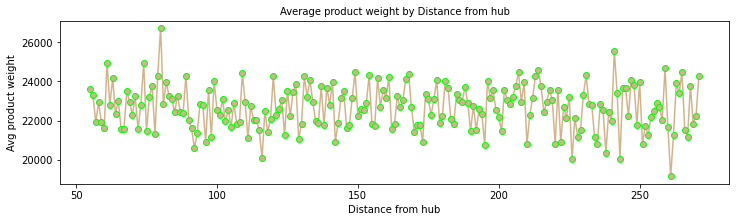

In [82]:
plt.figure(figsize=(6, 3))

# plot 1
#ax1 = plt.subplot2grid((1, 2), (0, 0)) 

bin =[55, 80, 105, 130, 155, 180, 205, 230, 255, 280]

# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['dist_from_hub'], bins=bin)

#plot bargraph
df_copy['bins'].value_counts().sort_index().plot(kind='bar', color='lightslategrey')

plt.title('Distribution of Distance from hub', fontsize=10)
plt.ylabel('Value counts')
plt.show()


avg_product_weight = df.groupby('dist_from_hub')['product_wg_ton'].mean()
plt.figure(figsize=(12, 3))
plt.plot(avg_product_weight.index, avg_product_weight.values, color='tan', marker='o', markeredgecolor = 'lime')
plt.title('Average product weight by Distance from hub', fontsize=10)
plt.xlabel('Distance from hub')
plt.ylabel('Avg product weight')

plt.show()

##### Distance from hub

* This column has many unique values, thus plotting graph in bins.
* The values are distributed almost evenly, except for last bin.
* The line plot shows variations in average product weight, ranging from 19,000 to 28,000, but no specific pattern is visible.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Retail shop number</h1>

In [83]:
print("Total no. of unique values in no. of retail shops", len(df['retail_shop_num'].unique()))
print('  ')

# define bin edges : 
# Retail shop number : min value = 1821, max value = 11008

bins =[1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000]

# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['retail_shop_num'], bins)

bin_counts = df_copy['bins'].value_counts().sort_index()

# Create a DataFrame from bin_counts
table_df = pd.DataFrame({'Bin': bin_counts.index, 'Count': bin_counts.values})

# Display the table
print(table_df)

Total no. of unique values in no. of retail shops 4039
  
              Bin  Count
0    (1500, 3000]    211
1    (3000, 4500]   6850
2    (4500, 6000]  11219
3    (6000, 7500]   2338
4    (7500, 9000]      0
5   (9000, 10500]      0
6  (10500, 12000]      0


In [199]:
print("Total no. of unique values in no. of retail shops", len(df['retail_shop_num'].unique()))
print('  ')

# define bin edges : 
# Retail shop number : min value = 1821, max value = 11008

bins =[1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000]

# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['retail_shop_num'], bins)

bin_counts = df_copy['bins'].value_counts().sort_index()

# Create a DataFrame from bin_counts
table_df = pd.DataFrame({'Bin': bin_counts.index, 'Count': bin_counts.values})

# Display the table
print(table_df)

Total no. of unique values in no. of retail shops 3690
  
              Bin  Count
0    (1500, 3000]    141
1    (3000, 4500]   4559
2    (4500, 6000]   7394
3    (6000, 7500]   1567
4    (7500, 9000]      0
5   (9000, 10500]      0
6  (10500, 12000]      0


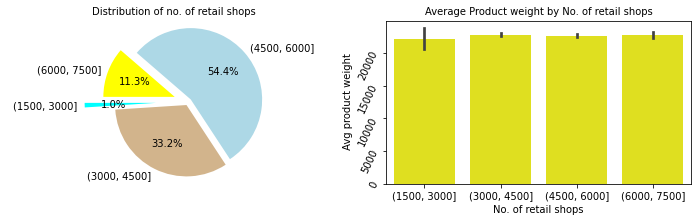

In [86]:
plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0)) 

# define bin edges
bins =[1500, 3000, 4500, 6000, 7500]

# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['retail_shop_num'], bins)

#plot bargraph

df_copy['bins'].value_counts().sort_index().plot(kind='pie',  colors = ['cyan', 'tan', 'lightblue', 'yellow'], autopct='%1.1f%%', explode=(0.45, 0.05, 0.05, 0.2),
                                     startangle=180, ylabel='  ')
plt.axis('equal')
plt.title('Distribution of no. of retail shops', fontsize=10)


# plot 1

ax2 = plt.subplot2grid((1, 2), (0, 1)) 
sns.barplot(data=df_copy, x='bins', y='product_wg_ton', color='yellow')

plt.ylabel(' Avg product weight')
plt.xlabel('No. of retail shops')
plt.title('Average Product weight by No. of retail shops', fontsize=10)
plt.yticks(rotation=65)
plt.show()

#### No. of Retail shops

* This column has the highest number of unique values, thus plotting graph in bins.
* Analysing the table of bin versus value counts and pie chart, the bin ranges from 4500 to 6000 contains the highest number of values.
* Comparing the average product weight by the number of retail shops with a bar chart, no noticable difference is observed.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Transformation</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Encoding</h1>

In [87]:
# Numerical columns & categorical columns in train dataset

num_columns_train=[i for i in df.columns if df[i].dtypes != 'O']
cat_columns_train=[i for i in df.columns if df[i].dtypes == 'O']

# Numerical columns & categorical columns in test dataset

num_columns_test=[i for i in df_test.columns if df_test[i].dtypes != 'O']
cat_columns_test=[i for i in df_test.columns if df_test[i].dtypes == 'O']


In [88]:
# Label Encoding for categorical variables
 
for i in cat_columns_train:
    df[i] = LabelEncoder().fit_transform(df[i])

for i in cat_columns_test:
    df_test[i] = LabelEncoder().fit_transform(df_test[i])

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Scaling</h1>

In [89]:
# display number of unique values in each column
df.nunique().sort_values(ascending=False)

product_wg_ton                  4489
retail_shop_num                 4039
dist_from_hub                    217
distributor_num                   56
storage_issue_reported_l3m        37
workers_num                       36
govt_check_l3m                    32
num_refill_req_l3m                 9
Competitor_in_mkt                  8
wh_breakdown_l3m                   7
WH_regional_zone                   6
approved_wh_govt_certificate       5
zone                               4
transport_issue_l1y                3
WH_capacity_size                   3
wh_owner_type                      2
electric_supply                    2
temp_reg_mach                      2
Location_type                      2
dtype: int64

In [92]:
columns_with_more_than_two_unique_values_train = df.columns[df.nunique()>2]

In [93]:
columns_with_more_than_two_unique_values_test = df_test.columns[df_test.nunique()>2]

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20618 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 20618 non-null  int64  
 1   WH_capacity_size              20618 non-null  int64  
 2   zone                          20618 non-null  int64  
 3   WH_regional_zone              20618 non-null  int64  
 4   num_refill_req_l3m            20618 non-null  int64  
 5   transport_issue_l1y           20618 non-null  int64  
 6   Competitor_in_mkt             20618 non-null  int64  
 7   retail_shop_num               20618 non-null  int64  
 8   wh_owner_type                 20618 non-null  int64  
 9   distributor_num               20618 non-null  int64  
 10  electric_supply               20618 non-null  int64  
 11  dist_from_hub                 20618 non-null  int64  
 12  workers_num                   20618 non-null  float64
 13  storag

In [95]:
# Standard Scaling for numerical variables

for i in columns_with_more_than_two_unique_values_train:
  df[i] = StandardScaler().fit_transform(df[[i]])

for i in columns_with_more_than_two_unique_values_test:
  df_test[i] = StandardScaler().fit_transform(df_test[[i]])

In [96]:
df.sample(5).T

,9795,16695,7315,20022,15914
Location_type,0.000000,0.000000,0.000000,0.000000,0.000000
WH_capacity_size,-1.051982,0.294289,-1.051982,-1.051982,-1.051982
zone,-0.996256,-0.996256,-0.996256,1.277466,1.277466
WH_regional_zone,0.448269,-0.753136,0.448269,1.048972,1.048972
num_refill_req_l3m,-1.171527,-1.554416,1.508695,-1.171527,0.360028
transport_issue_l1y,-0.617539,-0.617539,-0.617539,0.888009,2.393557
Competitor_in_mkt,-0.995304,-0.995304,-0.995304,-0.082318,-0.082318
retail_shop_num,-1.294869,-0.392238,-0.788936,-1.352361,-0.813082
wh_owner_type,0.000000,0.000000,1.000000,1.000000,1.000000
distributor_num,-1.519630,-1.021311,-0.149253,-1.270470,-0.336123


In [97]:
df_test.sample(5).T

,22395,10270,1160,10536,12996
Location_type,0.000000,0.000000,0.000000,0.000000,0.000000
WH_capacity_size,0.294289,-1.051982,-1.051982,0.294289,-1.051982
zone,1.277466,0.140605,-0.996256,0.140605,-0.996256
WH_regional_zone,-0.152434,1.048972,1.048972,-1.353839,1.048972
num_refill_req_l3m,1.125806,1.125806,-1.554416,0.360028,1.508695
transport_issue_l1y,-0.617539,-0.617539,0.888009,-0.617539,-0.617539
Competitor_in_mkt,0.830667,0.830667,0.830667,-0.995304,0.830667
retail_shop_num,-0.140422,0.258575,2.079934,-0.602660,0.527640
wh_owner_type,0.000000,1.000000,1.000000,1.000000,0.000000
distributor_num,-0.336123,-0.772152,-1.208180,-0.398413,-0.772152


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Feature Selection</h1>

In [98]:
# correlation heatmap

In [128]:
Y_test


0       -0.471836
1       -1.493436
2        0.039092
4        0.118336
5        0.802429
           ...   
24994   -0.983612
24995    0.798951
24996   -0.896138
24997    0.373630
24999   -1.494794
Name: product_wg_ton, Length: 20618, dtype: float64

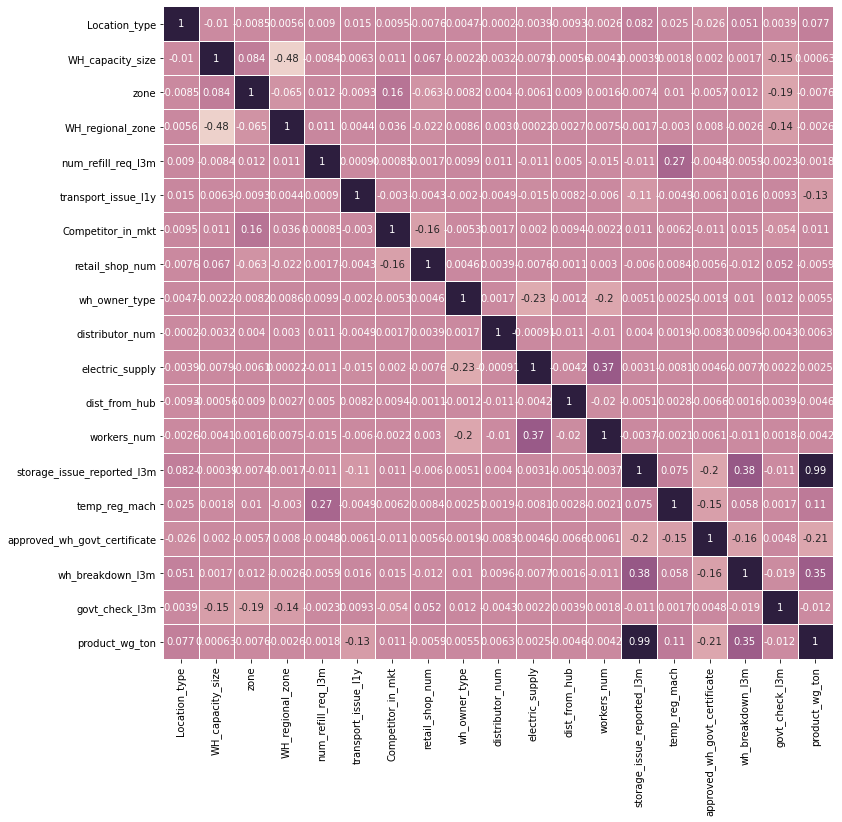

In [99]:
plt.figure(figsize=(12, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=1, cbar=False)
plt.show()

In [100]:
data = df.loc[:, df.columns !='product_wg_ton']
correlations = data.corrwith(df['product_wg_ton']).round(3).sort_values(ascending=True)
correlations

approved_wh_govt_certificate   -0.206
transport_issue_l1y            -0.131
govt_check_l3m                 -0.012
zone                           -0.008
retail_shop_num                -0.006
dist_from_hub                  -0.005
workers_num                    -0.004
WH_regional_zone               -0.003
num_refill_req_l3m             -0.002
WH_capacity_size                0.001
electric_supply                 0.003
wh_owner_type                   0.005
distributor_num                 0.006
Competitor_in_mkt               0.011
Location_type                   0.077
temp_reg_mach                   0.110
wh_breakdown_l3m                0.347
storage_issue_reported_l3m      0.986
dtype: float64

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Splitting Dataset</h1>

In [101]:
#Selecting Independent (Features) & Dependent(Target) variables

X_train = df.drop(['product_wg_ton', 'num_refill_req_l3m', 'WH_regional_zone'], axis=1)
Y_train = df['product_wg_ton']

X_test = df_test.drop(['product_wg_ton', 'num_refill_req_l3m', 'WH_regional_zone'], axis=1)
Y_test = df_test['product_wg_ton']

In [102]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (20618, 16)
Shape of X_test: (20618, 16)


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Modelling</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Regression Models</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Linear Regression</h1>

In [103]:
# Initialize the model

LRmodel = LinearRegression()

In [104]:
# Fit model to the training data

LRmodel.fit(X_train, Y_train)

LinearRegression()

In [105]:
# Make predictions on the test data

LR_predicted = LRmodel.predict(X_test)

In [106]:
# Evaluate  the model

# r2 score
lr_r2 = r2_score(Y_test, LR_predicted).round(3)
print('R2 score:  ', lr_r2)

# root mean squared error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(Y_test, LR_predicted)).round(3)
print('Root Mean Squared Error:  ', lr_rmse) 

# mean absolute error (MAE)
lr_mae = mean_absolute_error(Y_test, LR_predicted).round(3)
print('Mean Absolute Error:  ', lr_mae)


R2 score:   0.976
Root Mean Squared Error:   0.154
Mean Absolute Error:   0.113


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Decision Tree</h1>

In [107]:
# Initialize the model

DTmodel = DecisionTreeRegressor(random_state = 0) 

In [108]:
# Fit model to the training data

DTmodel.fit(X_train, Y_train) 

DecisionTreeRegressor(random_state=0)

In [109]:
# Make predictions on the test data

DT_predicted = DTmodel.predict(X_test)

In [110]:
# Evaluate  the model

# r2 score
dt_r2 = r2_score(Y_test, DT_predicted).round(3)
print('R2 score:  ', dt_r2)

# root mean squared error (RMSE)
dt_rmse = np.sqrt(mean_squared_error(Y_test, DT_predicted)).round(3)
print('Root Mean Squared Error:  ', dt_rmse) 

# mean absolute error (MAE)
dt_mae = mean_absolute_error(Y_test, DT_predicted).round(3)
print('Mean Absolute Error:  ', dt_mae)


R2 score:   1.0
Root Mean Squared Error:   0.0
Mean Absolute Error:   0.0


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Random Forest</h1>

In [111]:
# Initialize the model

RFmodel = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 0) 

In [112]:
# Fit model to the training data

RFmodel.fit(X_train, Y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [113]:
# Make predictions on the test data

RF_predicted = RFmodel.predict(X_test)

In [114]:
# Evaluate  the model

# r2 score
rf_r2 = r2_score(Y_test, RF_predicted).round(3)
print('R2 score:  ', rf_r2)

# root mean squared error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(Y_test, RF_predicted)).round(3)
print('Root Mean Squared Error:  ', rf_rmse) 

# mean absolute error (MAE)
rf_mae = mean_absolute_error(Y_test, RF_predicted).round(3)
print('Mean Absolute Error:  ', rf_mae)


R2 score:   0.98
Root Mean Squared Error:   0.14
Mean Absolute Error:   0.108


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Support Vector Machine</h1>

In [115]:
# Initialize the model

SVmodel = SVR() 

In [116]:
# Fit model to the training data

SVmodel.fit(X_train, Y_train) 

SVR()

In [117]:
# Make predictions on the test data

SV_predicted = SVmodel.predict(X_test) 

In [118]:
# Evaluate  the model

# r2 score
sv_r2 = r2_score(Y_test, SV_predicted).round(3)
print('R2 score:  ', sv_r2)

# root mean squared error (RMSE)
sv_rmse = np.sqrt(mean_squared_error(Y_test, SV_predicted)).round(3)
print('Root Mean Squared Error:  ', sv_rmse) 

# mean absolute error (MAE)
sv_mae = mean_absolute_error(Y_test, SV_predicted).round(3)
print('Mean Absolute Error:  ', sv_mae)

R2 score:   0.992
Root Mean Squared Error:   0.088
Mean Absolute Error:   0.07


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Gradient Boosting</h1>

In [119]:
# Initialize the model

GBmodel = GradientBoostingRegressor()

In [120]:
# Fit model to the training data

GBmodel.fit(X_train,Y_train)

GradientBoostingRegressor()

In [121]:
# Make predictions on the test data

GB_predicted = GBmodel.predict(X_test)

In [122]:
# Evaluate  the model

# r2 score
gb_r2 = r2_score(Y_test, GB_predicted).round(3)
print('R2 score:  ', gb_r2)

# root mean squared error (RMSE)
gb_rmse = np.sqrt(mean_squared_error(Y_test, GB_predicted)).round(3)
print('Root Mean Squared Error:  ', gb_rmse) 

# mean absolute error (MAE)
gb_mae = mean_absolute_error(Y_test, GB_predicted).round(3)
print('Mean Absolute Error:  ', gb_mae)

R2 score:   0.993
Root Mean Squared Error:   0.084
Mean Absolute Error:   0.062


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px"> Actual vs Predicted Values</h1>

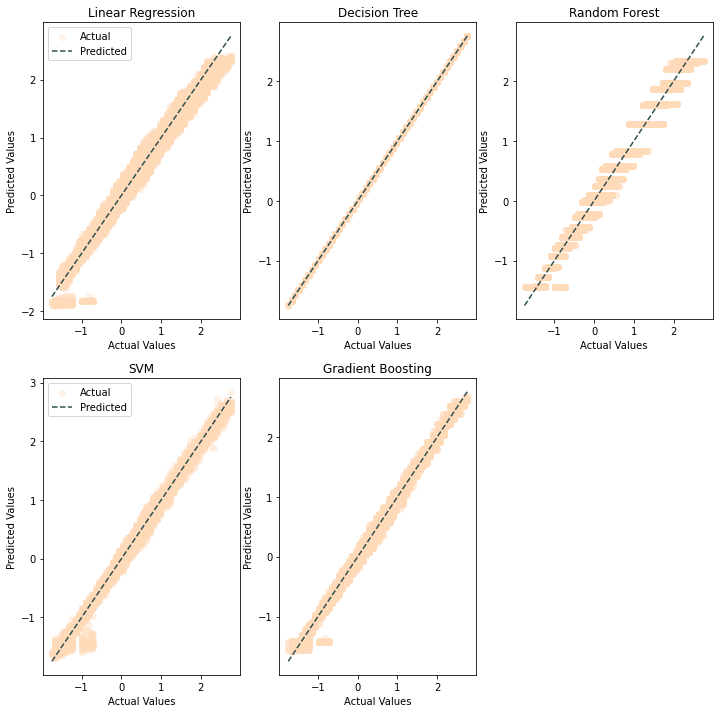

In [124]:
plt.figure(figsize=(12, 12))


# linear regression

ax1 = plt.subplot2grid((2, 3), (0, 0))
plt.scatter(Y_test, LR_predicted, color='#ffdab9', alpha=0.3, label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# decision tree

ax1 = plt.subplot2grid((2, 3), (0, 1))
plt.scatter(Y_test, DT_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# random forest

ax1 = plt.subplot2grid((2, 3), (0, 2))
plt.scatter(Y_test, RF_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# svm

ax1 = plt.subplot2grid((2, 3), (1, 0))
plt.scatter(Y_test, SV_predicted, color='#ffdab9', alpha=0.3, label='Actual')  # alpha controls point transparency for better visualization
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f', label='Predicted')
plt.title('SVM')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# gb

ax1 = plt.subplot2grid((2, 3), (1, 1))
plt.scatter(Y_test, GB_predicted, color='#ffdab9', alpha=0.3)  # alpha controls point transparency for better visualization
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--',color='#2f4f4f')
plt.title('Gradient Boosting')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px"> Metrics Table Evaluation</h1>

In [125]:
Metrics = pd.DataFrame({'Model':('Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting'),
                       'R2 Score': (lr_r2, dt_r2, rf_r2, sv_r2, gb_r2),
                       'Root Mean Squared Error': (lr_rmse, dt_rmse, rf_rmse, sv_rmse, gb_rmse),
                       'Mean Absolute Error': (lr_mae, dt_mae, rf_mae, sv_mae, gb_mae),
                      })
Metrics

,Model,R2 Score,Root Mean Squared Error,Mean Absolute Error
0,Linear Regression,0.976,0.154,0.113
1,Decision Tree,1.000,0.000,0.000
2,Random Forest,0.980,0.140,0.108
3,SVM,0.992,0.088,0.070
4,Gradient Boosting,0.993,0.084,0.062
